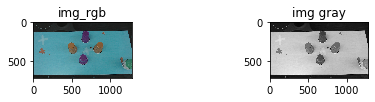

In [40]:
import numpy as np
import cv as cv
import matplotlib.pyplot as plt
# file = 'circles.png'
file = 'frame0000.jpg'    
img_rgb = cv.imread(file)
img_gray = cv.imread(file, cv.IMREAD_GRAYSCALE)
assert img_rgb is not None, "file could not be read, check with os.path.exists()"

plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('img_rgb')

plt.subplot(1, 3, 3)
plt.imshow(img_gray, cmap='gray')
plt.title('img gray')

img = img_rgb

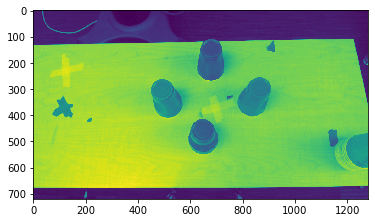

In [56]:

img = cv.medianBlur(img,5)
rows = img.shape[0]
cimg = cv.cvtColor(img,cv.COLOR_RGB2BGRA)
plt.imshow(img)
img = img_gray
# circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
#                             param1=50,param2=30,minRadius=0,maxRadius=0)
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,rows/8,
                            param1=100,param2=30,minRadius=10,maxRadius=50)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
cv.imshow('detected circles',cimg)
cv.waitKey(0)
cv.destroyAllWindows()

In [57]:
for i, center in enumerate(circles[0, :]):
    print(f"Center {i + 1}: ({center[0]}, {center[1]})\n")

Center 1: (648, 460)

Center 2: (496, 302)

Center 3: (866, 300)

Center 4: (1218, 562)

Center 5: (680, 150)



In [71]:
# given image, get edges.
# use opencv - edge detection
# Blur the image for better edge detection

img_blur = cv.GaussianBlur(img_gray, (5,5), 0) 

edges = cv.Canny(image=img_blur, threshold1=100, threshold2=200) 
 
cv.imshow('Canny Edge Detection', edges)
cv.waitKey(0)

-1

In [ ]:

# find corners of image
# get corners in sawyer coordinates (through ar tags or hardcoding)
# use bounding box on edges